In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Example of multi-label multi-class dataframe

In [108]:
df = pd.DataFrame({'label1': ['A', 'B', 'B', 'C', 'C', 'C'],
                   'label2': ['D', 'D', 'D', 'E', 'F', 'G'],
                   'label3': ['A', 'B', 'C', 'D', 'E', 'F']
                  }, dtype='category')
df

,label1,label2,label3
0,A,D,A
1,B,D,B
2,B,D,C
3,C,E,D
4,C,F,E
5,C,G,F


# Number of unique classes per label

In [117]:
nunique_classes = df.apply(pd.Series.nunique)
nunique_classes

label1    3
label2    4
label3    6
dtype: int64

# From labels to dummy variables

In [118]:
y = pd.get_dummies(df)
y

,label1_A,label1_B,label1_C,label2_D,label2_E,label2_F,label2_G,label3_A,label3_B,label3_C,label3_D,label3_E,label3_F
0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,0,0,1


# Class indices to the dummy variables

In [124]:
label_margins = nunique_classes.cumsum()
class_indices = [list(range(start, stop)) for start, stop in list(zip((label_margins - nunique_classes), label_margins))]
class_indices

[[0, 1, 2], [3, 4, 5, 6], [7, 8, 9, 10, 11, 12]]

# Accessing classes per label

Various ways to do that:

In [168]:
print('dict of label indices and class indices:')
print({l: c for l,c in enumerate(class_indices)})
print('\ndict of labels and classes:')
print({df.columns[l]: y.columns[c].to_list() for l,c in enumerate(class_indices)})
print('\ndict of labels and class indices:')
print({df.columns[l]: c for l,c in enumerate(class_indices)})
print('\ndict of label indices and classes:')
print({l: y.columns[c].to_list() for l,c in enumerate(class_indices)})

dict of label indices and class indices:
{0: [0, 1, 2], 1: [3, 4, 5, 6], 2: [7, 8, 9, 10, 11, 12]}

dict of labels and classes:
{'label1': ['label1_A', 'label1_B', 'label1_C'], 'label2': ['label2_D', 'label2_E', 'label2_F', 'label2_G'], 'label3': ['label3_A', 'label3_B', 'label3_C', 'label3_D', 'label3_E', 'label3_F']}

dict of labels and class indices:
{'label1': [0, 1, 2], 'label2': [3, 4, 5, 6], 'label3': [7, 8, 9, 10, 11, 12]}

dict of label indices and classes:
{0: ['label1_A', 'label1_B', 'label1_C'], 1: ['label2_D', 'label2_E', 'label2_F', 'label2_G'], 2: ['label3_A', 'label3_B', 'label3_C', 'label3_D', 'label3_E', 'label3_F']}


In [126]:
for l, c in enumerate(class_indices):
    print('Label:', df.columns[l])
    display(y.iloc[:,class_indices[l]])

Label: label1


,label1_A,label1_B,label1_C
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1


Label: label2


,label2_D,label2_E,label2_F,label2_G
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
5,0,0,0,1


Label: label3


,label3_A,label3_B,label3_C,label3_D,label3_E,label3_F
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


# Dummy sums

## Column sums: class frequency

In [134]:
y.sum()

label1_A    1
label1_B    2
label1_C    3
label2_D    3
label2_E    1
label2_F    1
label2_G    1
label3_A    1
label3_B    1
label3_C    1
label3_D    1
label3_E    1
label3_F    1
dtype: int64

## Row sums: always sum up to the number of labels

In [135]:
y.sum(axis=1)

0    3
1    3
2    3
3    3
4    3
5    3
dtype: int64

## Column sums by label: label frequency = number of rows

In [136]:
{df.columns[l]: y.iloc[:,c].sum().sum() for l, c in enumerate(class_indices)}

{'label1': 6, 'label2': 6, 'label3': 6}

# Dummy averages

## Column averages: class probabilities 

In [228]:
y.mean()

label1_A    0.166667
label1_B    0.333333
label1_C    0.500000
label2_D    0.500000
label2_E    0.166667
label2_F    0.166667
label2_G    0.166667
label3_A    0.166667
label3_B    0.166667
label3_C    0.166667
label3_D    0.166667
label3_E    0.166667
label3_F    0.166667
dtype: float64

## Products of class probabilities

In [264]:
# Product of all column averages
print(f'{y.mean().prod():,.20f}')

0.00000000137818097399


Factors

In [271]:
# Products of column averages within labels
[y.iloc[:,l].mean().prod() for l in class_indices]

[0.027777777777777776, 0.0023148148148148147, 2.1433470507544577e-05]

## Column averages by label: label probabilities

In [280]:
[y.iloc[:,l].values.mean() for l in class_indices]

[0.3333333333333333, 0.25, 0.16666666666666666]

Is the same as the probability distribution of number of unique classes

In [281]:
1 / nunique_classes.values

array([0.33333333, 0.25      , 0.16666667])

## Product of column averages by label: product of label probabilities

In [282]:
np.product([y.iloc[:,l].values.mean() for l in class_indices])

0.013888888888888888

## Row averages: allways averages to labels / classes ratio

In [ ]:
y.mean(axis=1)

0    0.230769
1    0.230769
2    0.230769
3    0.230769
4    0.230769
5    0.230769
dtype: float64

In [ ]:
len(df.columns) / len(y.columns)

0.23076923076923078

## Products of row averages

In [289]:
y.mean(axis=1).product()

0.00015103145784305954

In [290]:
[y.iloc[:,l].mean(axis=1).prod() for l in class_indices]

[0.001371742112482853, 0.000244140625, 2.1433470507544577e-05]

# Random classes and train-test split simulation

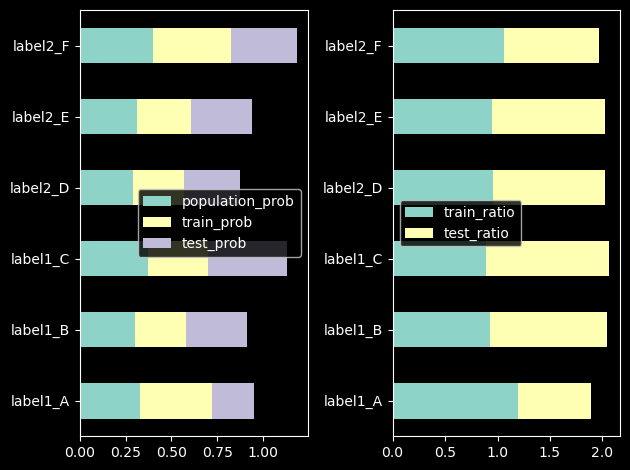

In [292]:
n = 100
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#plt.ion()
for i in range(100):
    rng = np.random.RandomState()
    df = pd.DataFrame({'label1':rng.choice(['A','B','C'], n),
                       'label2':rng.choice(['D', 'E', 'F'], n)}, dtype='category')
    y=pd.get_dummies(df)
    indices = rng.choice(y.index, size=np.floor(y.shape[0]/2).astype('int'))
    test_mask = y.index.isin(indices)
    test = y[test_mask]
    train = y[~test_mask]
    mle = pd.concat({'population_prob':y.mean(), 'train_prob':train.mean(), 'test_prob':test.mean()}, axis=1)
    ratios=pd.DataFrame()
    ratios['train_ratio'] = mle.train_prob / mle.population_prob
    ratios['test_ratio'] = mle.test_prob / mle.population_prob
    ax1.clear()
    ax2.clear()
    mle.plot(kind='barh', stacked=True, ax=ax1)
    ratios.plot(kind='barh', stacked=True, ax=ax2)
    ax1.legend(loc='center right')
    ax2.legend(loc='center left')
    plt.tight_layout()
    fig.canvas.draw()
#plt.ioff()